<a href="https://colab.research.google.com/github/Chung-god/commerceAnaly/blob/main/E_commerce.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All"
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [7]:
import pandas as pd

# 데이터 불러오기
data = pd.read_csv('/Train.csv')

# 데이터 구조 확인
print(data.info())       # 열 정보 및 데이터 타입
print(data.head())       # 상위 5개 행 출력
print(data.describe())   # 통계 요약
print(data.columns)      # 열 이름 출력
print(data.isnull().sum()) # 결측치 확인


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10999 entries, 0 to 10998
Data columns (total 12 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   ID                   10999 non-null  int64 
 1   Warehouse_block      10999 non-null  object
 2   Mode_of_Shipment     10999 non-null  object
 3   Customer_care_calls  10999 non-null  int64 
 4   Customer_rating      10999 non-null  int64 
 5   Cost_of_the_Product  10999 non-null  int64 
 6   Prior_purchases      10999 non-null  int64 
 7   Product_importance   10999 non-null  object
 8   Gender               10999 non-null  object
 9   Discount_offered     10999 non-null  int64 
 10  Weight_in_gms        10999 non-null  int64 
 11  Reached.on.Time_Y.N  10999 non-null  int64 
dtypes: int64(8), object(4)
memory usage: 1.0+ MB
None
   ID Warehouse_block Mode_of_Shipment  Customer_care_calls  Customer_rating  \
0   1               D           Flight                    4           

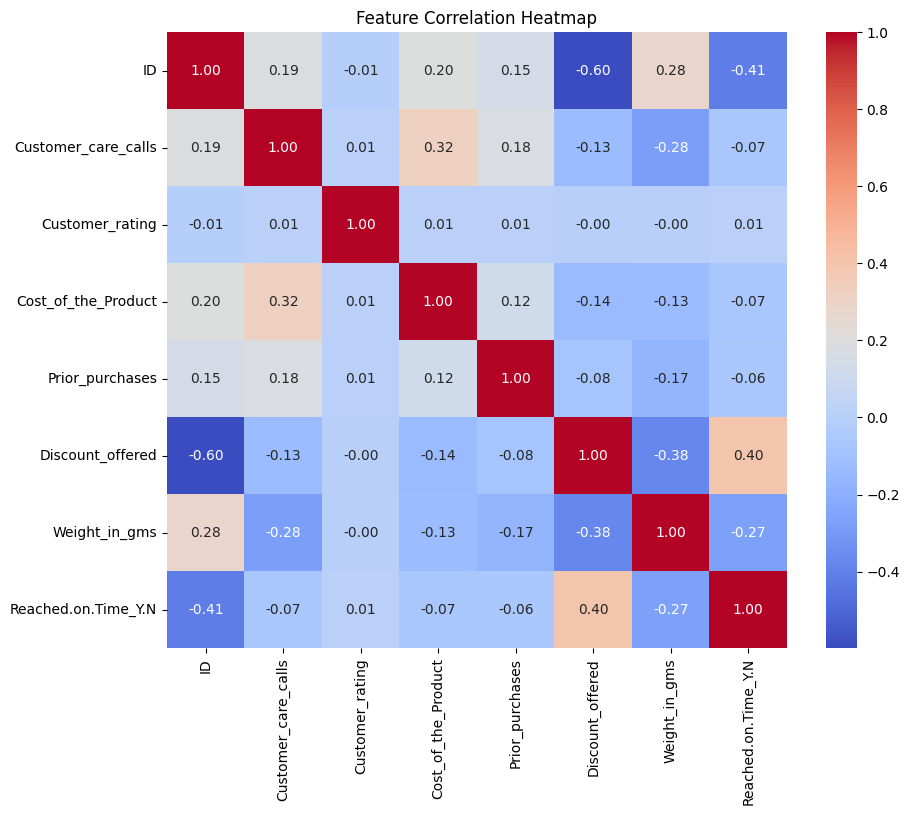

In [9]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# 데이터 불러오기
data = pd.read_csv('/Train.csv')

# 숫자형 열만 선택
numeric_data = data.select_dtypes(include=['number'])

# 상관관계 분석
plt.figure(figsize=(10, 8))
sns.heatmap(numeric_data.corr(), annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Feature Correlation Heatmap")
plt.show()


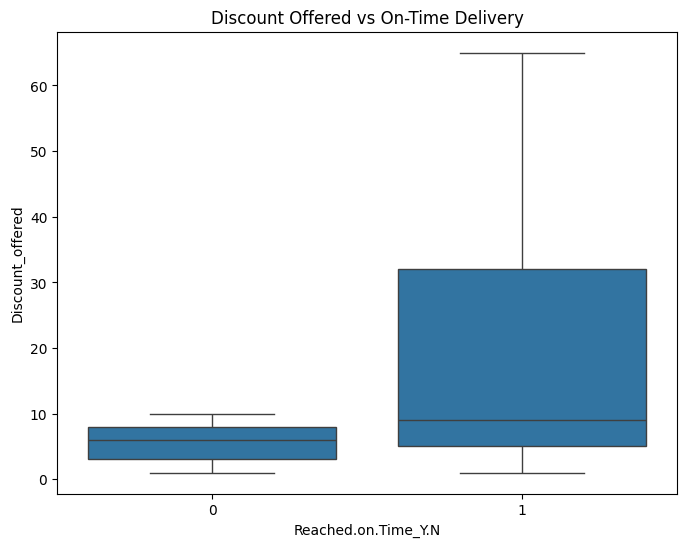

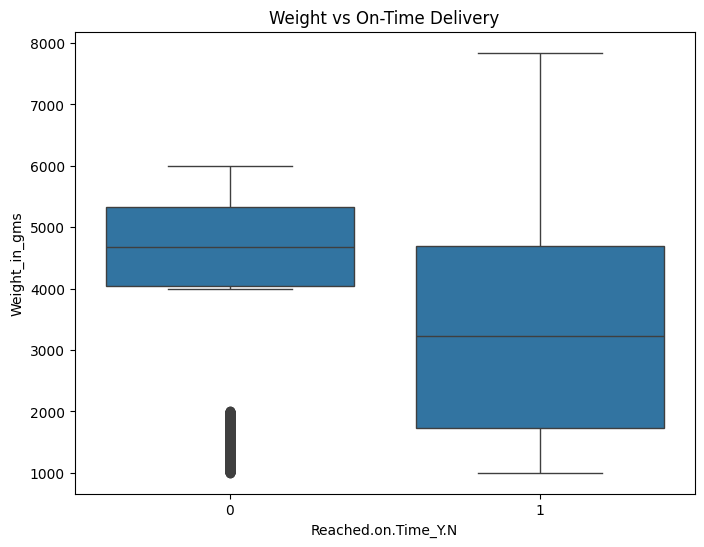

In [10]:
# 할인율과 배송 지연 관계
plt.figure(figsize=(8, 6))
sns.boxplot(x='Reached.on.Time_Y.N', y='Discount_offered', data=data)
plt.title('Discount Offered vs On-Time Delivery')
plt.show()

# 제품 무게와 배송 지연 관계
plt.figure(figsize=(8, 6))
sns.boxplot(x='Reached.on.Time_Y.N', y='Weight_in_gms', data=data)
plt.title('Weight vs On-Time Delivery')
plt.show()


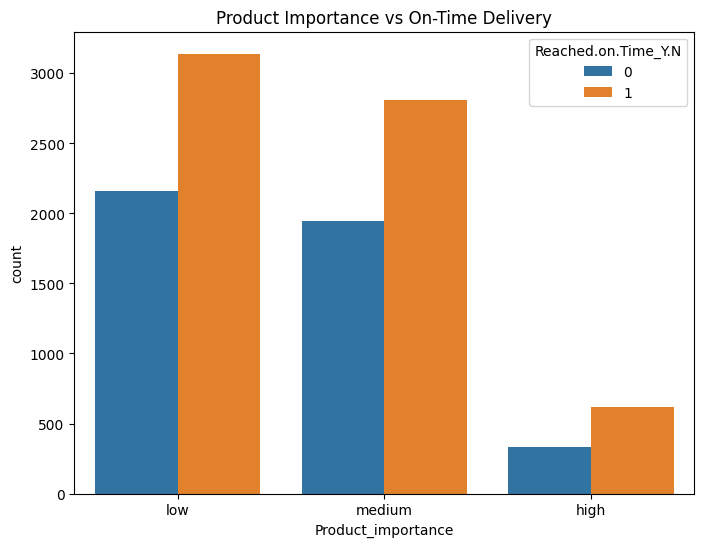

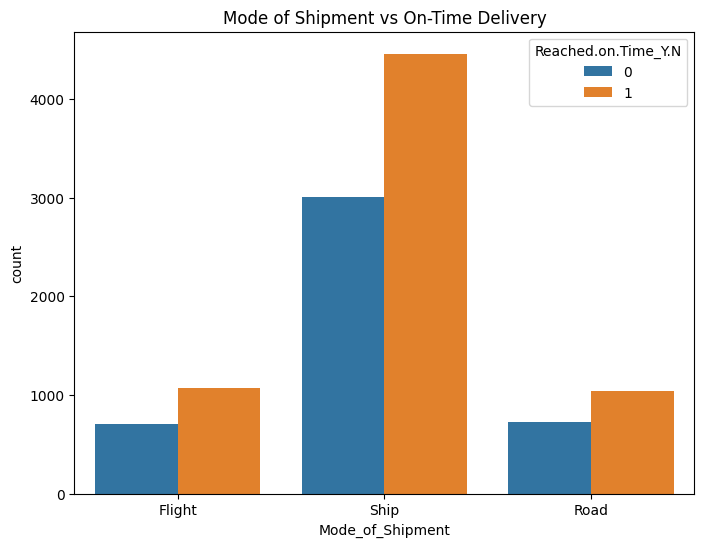

In [11]:
# 제품 중요도에 따른 배송 지연
plt.figure(figsize=(8, 6))
sns.countplot(x='Product_importance', hue='Reached.on.Time_Y.N', data=data)
plt.title('Product Importance vs On-Time Delivery')
plt.show()

# 배송 방식에 따른 지연 분석
plt.figure(figsize=(8, 6))
sns.countplot(x='Mode_of_Shipment', hue='Reached.on.Time_Y.N', data=data)
plt.title('Mode of Shipment vs On-Time Delivery')
plt.show()


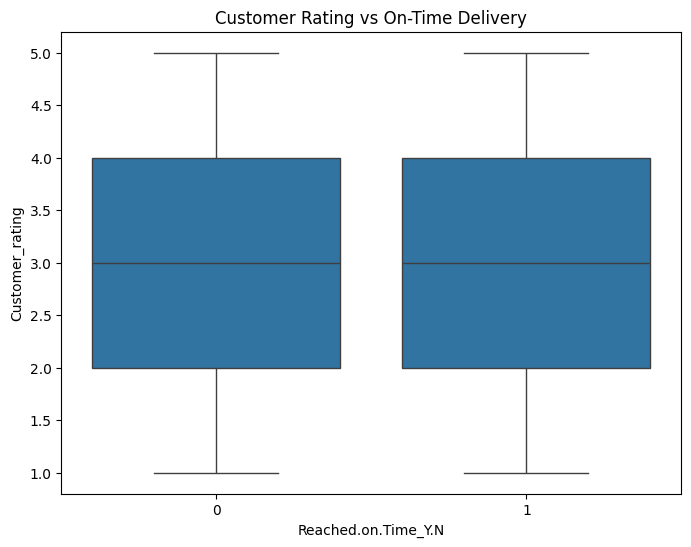

In [13]:
plt.figure(figsize=(8, 6))
sns.boxplot(x='Reached.on.Time_Y.N', y='Customer_rating', data=data)
plt.title('Customer Rating vs On-Time Delivery')
plt.show()


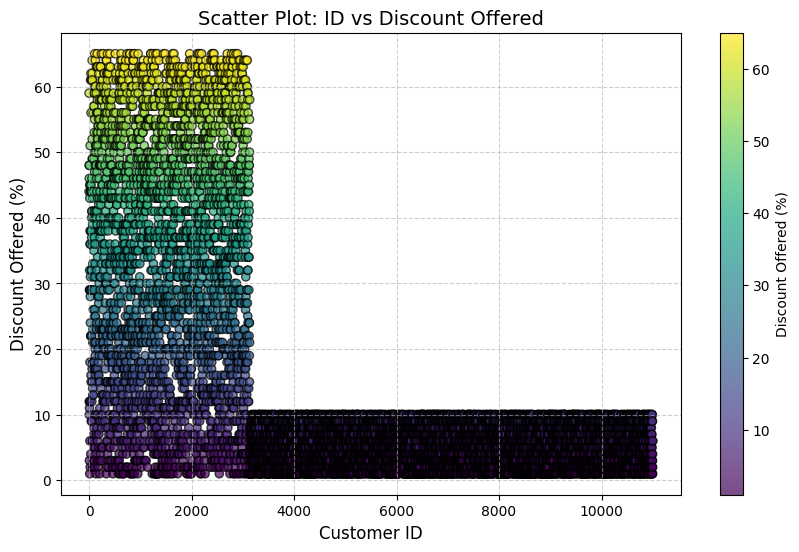

In [12]:
import matplotlib.pyplot as plt
import seaborn as sns

# 색상 팔레트 설정
palette = sns.color_palette("viridis", as_cmap=True)

# 산점도 그리기
plt.figure(figsize=(10, 6))
scatter = plt.scatter(data['ID'], data['Discount_offered'], c=data['Discount_offered'], cmap=palette, alpha=0.7, edgecolors='k')

# 색상 바 추가
plt.colorbar(scatter, label='Discount Offered (%)')

# 제목 및 라벨 추가
plt.title("Scatter Plot: ID vs Discount Offered", fontsize=14)
plt.xlabel("Customer ID", fontsize=12)
plt.ylabel("Discount Offered (%)", fontsize=12)

plt.grid(True, linestyle='--', alpha=0.6)  # 그리드 추가
plt.show()
